In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save file paths to variables "mouse_path" and "clinical_trial_path", respectively
mouse_path = "data/mouse_drug_data.csv"
clinical_trial_path = "data/clinicaltrial_data.csv"

In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_ori_data = pd.read_csv(mouse_path)
clinical_trial_ori_data = pd.read_csv(clinical_trial_path)

In [4]:
# Preview "mouse_ori_data"
mouse_ori_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Preview "clinical_trial_ori_data"
clinical_trial_ori_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
merged_ori_data = pd.merge(clinical_trial_ori_data, mouse_ori_data, on="Mouse ID", how="left")

# Display the data table for preview
merged_ori_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [7]:
# Get column names in "merged_ori_data" and check for incomplete rows
merged_ori_data.count()

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

In [8]:
# Drop all rows with missing information if any (rarely only if all columns lacks the same amounts of data)
merged_ori_data = merged_ori_data.dropna(how="any")

# Display cleanuped data table for preview
merged_ori_data.count()

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

## Tumor Response to Treatment

In [9]:
# Store "Tumor Volume" data grouped by "Drug" and "Timepoint" to "tumor_vol"
tumor_vol = merged_ori_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]

# Store the mean of "Tumor Volume" to "tumor_vol_avg"
tumor_vol_avg = tumor_vol.mean()

# Check the type of "tumor_vol_avg"
type(tumor_vol_avg)

pandas.core.series.Series

In [10]:
# Convert to DataFrame
tumor_vol_avg = tumor_vol_avg.reset_index()

# Preview "tumor_vol_avg"
tumor_vol_avg.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Store the standard error of "Tumor Volume" to "tumor_vol_se"
tumor_vol_se = tumor_vol.sem()

# Check the type of "tumor_vol_se"
type(tumor_vol_se)

pandas.core.series.Series

In [12]:
# Convert to DataFrame
tumor_vol_se = tumor_vol_se.reset_index()

# Preview "tumor_vol_se"
tumor_vol_se.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
# Pivot "tumor_vol_avg" to re-format the DataFrame and save as "pivot_tumor_vol_avg"
pivot_tumor_vol_avg = tumor_vol_avg.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview "pivot_tumor_vol_avg"
pivot_tumor_vol_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [14]:
# Pivot "tumor_vol_se" to re-format the DataFrame and save as "pivot_tumor_vol_se"
pivot_tumor_vol_se = tumor_vol_se.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview "pivot_tumor_vol_se"
pivot_tumor_vol_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [15]:
# Check the index of "pivot_tumor_vol_avg" to be used as x-axis for plot
pivot_tumor_vol_avg.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [16]:
# Creat three lists to store "names", "formats", as well as "colors" info. for plot
names = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
fmts = ["o", "^", "s", "d"]
colors = ["r", "b", "g", "k"]

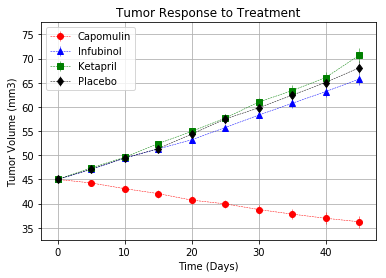

In [17]:
# A fancy (more precisely lazy) way to generate the plot
for drug, fmt, color in zip(names, fmts, colors):
    tumor_vol_plt = plt.errorbar(pivot_tumor_vol_avg.index, pivot_tumor_vol_avg[drug], pivot_tumor_vol_se[drug], linewidth=0.5, linestyle="--", fmt=fmt, color=color)

    # # Add legend
    # plt.legend(handles=[tumor_vol_plt], loc="best")
    
# Add figure title
plt.title("Tumor Response to Treatment")

# Add x- and y-axis labels
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Add legend
plt.legend(loc="best")

# Set x and y limits
plt.xlim(-2.5, 47.5)
plt.ylim(32.5, 77.5)

# Set a grid on the plot
plt.grid()

# Save the Figure
plt.savefig("Figures/Tumor Response to Treatment.png", dpi=300)

# Show the figure
plt.show()

## Metastatic Response to Treatment

In [18]:
# Store "Metastatic Sites" data grouped by "Drug" and "Timepoint" to "metastatic_count"
metastatic_count = merged_ori_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"]

# Store the mean of "Metastatic Sites" to "metastatic_count_avg"
metastatic_count_avg = metastatic_count.mean()

# Check the type of "metastatic_count_avg"
type(metastatic_count_avg)

pandas.core.series.Series

In [19]:
# Convert to DataFrame
metastatic_count_avg = metastatic_count_avg.reset_index()

# Preview "metastatic_count_avg"
metastatic_count_avg.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [20]:
# Store the standard error of "Metastatic Sites" to "metastatic_count_se"
metastatic_count_se = metastatic_count.sem()

# Check the type of "metastatic_count_se"
type(metastatic_count_se)

pandas.core.series.Series

In [21]:
# Convert to DataFrame
metastatic_count_se = metastatic_count_se.reset_index()

# Preview "metastatic_count_se"
metastatic_count_se.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [22]:
# Pivot "metastatic_count_avg" to re-format the DataFrame and save as "pivot_metastatic_count_avg"
pivot_metastatic_count_avg = metastatic_count_avg.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview "pivot_metastatic_count_avg"
pivot_metastatic_count_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [23]:
# Pivot "metastatic_count_se" to re-format the DataFrame and save as "pivot_metastatic_count_se"
pivot_metastatic_count_se = metastatic_count_se.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview "pivot_metastatic_count_se"
pivot_metastatic_count_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


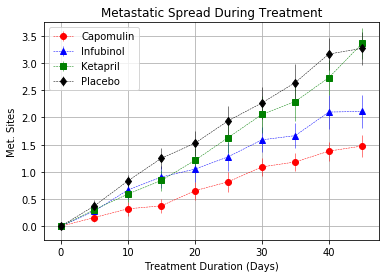

In [24]:
# Generate the plot
for drug, fmt, color in zip(names, fmts, colors):
    metastatic_count_plt = plt.errorbar(pivot_tumor_vol_avg.index, pivot_metastatic_count_avg[drug], pivot_metastatic_count_se[drug], linewidth=0.5, linestyle="--", fmt=fmt, color=color)
    
# Add figure title
plt.title("Metastatic Spread During Treatment")

# Add x- and y-axis labels
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Add legend
plt.legend(loc="best")

# Set x and y limits
plt.xlim(-2.5, 47.5)
plt.ylim(-0.25, 3.75)

# Set a grid on the plot
plt.grid()

# Save the Figure
plt.savefig("Figures/Metastatic Response to Treatment.png", dpi=300)

# Show the figure
plt.show()

In [25]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [26]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [27]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [28]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [29]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [30]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [31]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [32]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined